<a href="https://colab.research.google.com/github/GenoKiller777/AprendizajeSupervisado/blob/main/Evaluaci%C3%B3nFinal_SupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving hespe-data.csv to hespe-data.csv
User uploaded file "hespe-data.csv" with length 11407 bytes


In [26]:
#Definición de Funciones que aplicaremos más adelante.

#Genera una Matriz de confusión.
def plot_cm(y_true, y_pred, figsize=(7,7)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0.0%'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Valores Verdaderos'
    cm.columns.name = 'Prediccion'
    fig, ax = plt.subplots(figsize=figsize)

    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

#Genera la precisión del modelo.
def val_accuracy(d_test, y_predict):

    accuracy = []
    true_value = d_test#d_test # valores verdaderos
    predictions = y_predict#y_predict # predicciones hechas por el modelo
    cont_true_val = 0

    # conteo de los valores que se predicieron correctamente
    for i in range(len(true_value)):
        if true_value[i] == predictions[i]:
            cont_true_val = cont_true_val + 1

    # calculamos el porcentaje
    result = cont_true_val / float(len(true_value)) * 100.0

    accuracy.append(result)

    #Accuracy
    print('Accuracy: %.3f%%' % (sum(accuracy)/float(len(accuracy))))

### Importación de paquetes.

In [2]:
!pip install summarytools

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.9 MB/s eta 0:00:00
  Created wheel for summarytools: filename=summarytools-0.2.3-py3-none-any.whl size=8577 sha256=283106addd3e9bf2b321698c9a067c15453f1b37ab2eff8c7725952f63c316cc
  Stored in directory: /root/.cache/pip/wheels/d5/8a/5d/008e2127a7f9dd64d066f16e5ea268fa52823dc929c982d6f1
Successfully built summarytools


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from summarytools import dfSummary

### Estudio inicial de Datos.

#### Lectura del Dataset.

In [4]:
df = pd.read_csv('hespe-data.csv',sep=';')

#### Forma de Dataset.

In [5]:
df.shape

(145, 33)

#### Metadatos de Dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   student_id                    145 non-null    object
 1   age                           145 non-null    int64 
 2   sex                           145 non-null    int64 
 3   graduated_h_school_type       145 non-null    int64 
 4   scholarship_type              145 non-null    int64 
 5   additional_work               145 non-null    int64 
 6   activity                      145 non-null    int64 
 7   partner                       145 non-null    int64 
 8   total_salary                  145 non-null    int64 
 9   transport                     145 non-null    int64 
 10  accomodation                  145 non-null    int64 
 11  mother_ed                     145 non-null    int64 
 12  farther_ed                    145 non-null    int64 
 13  siblings            

#### Valores nulos.

In [7]:
df.isnull().sum()

#No hay valores nulos

student_id                      0
age                             0
sex                             0
graduated_h_school_type         0
scholarship_type                0
additional_work                 0
activity                        0
partner                         0
total_salary                    0
transport                       0
accomodation                    0
mother_ed                       0
farther_ed                      0
siblings                        0
parental_status                 0
mother_occup                    0
father_occup                    0
weekly_study_hours              0
reading_non_scientific          0
reading_scientific              0
attendance_seminars_dep         0
impact_of_projects              0
attendances_classes             0
preparation_midterm_company     0
preparation_midterm_time        0
taking_notes                    0
listenning                      0
discussion_improves_interest    0
flip_classrom                   0
grade_previous

#### Dropeo del campo 'student_id'.

In [8]:
df.head(3)
df.drop(columns=['student_id'], inplace=True)
df.head(3)

,age,sex,graduated_h_school_type,scholarship_type,additional_work,activity,partner,total_salary,transport,accomodation,...,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1


#### Pre Procesamiento.

In [9]:
X = df[['age','sex','graduated_h_school_type','scholarship_type','additional_work','activity','partner','total_salary',
        'transport','accomodation','mother_ed','farther_ed','siblings','parental_status','mother_occup','father_occup',
        'weekly_study_hours','reading_non_scientific','reading_scientific','attendance_seminars_dep','impact_of_projects','attendances_classes','preparation_midterm_company','preparation_midterm_time',
        'taking_notes','listenning','discussion_improves_interest','flip_classrom','grade_previous','grade_expected','course_id']]

y = df['grade']

In [10]:
df_Features = pd.DataFrame(X)
df_Target = pd.DataFrame(y)

### Estudio exploratorio de datos.

#### Variable 'Grade' - Vector Target.

In [11]:
dfSummary(df_Target)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,grade[int64],1. 12. 23. 34. 55. 76. 67. 48. 0,35 (24.1%)24 (16.6%)21 (14.5%)17 (11.7%)17 (11.7%)13 (9.0%)10 (6.9%)8 (5.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADMUlEQVR4nO3czWkbUQBG0acgTLKRMAYX4yJSbIpQN8Z4FonxRlmEQGKMrZ/RHZOcU8FbXJ6YYT6t9vv9gMKnpQ/A/0NsZMRGRmxkxEZGbGRWY4wvY4yrpQ/ywvN+v/+x9CGY1/rm5ubrZrO5Xvogf5qm6WG1Wn0T3L9lvdlsru/u7n5st9unpQ8zxhiPj4+fd7vd9f39/dUYQ2z/kPUYY2y326fb29vvSx/mD1+WPgDz84BARmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGZj3Gr896lj7Ibx/pLMxrPU3Tw263ux4f6LOeaZoexhjPS5+DefksnMzK3y9QKW82t9V/Lhu8GLGQDF6MWBijHbx8mKddluGlLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5lk8GLEwhjh4MWIBZ+FkzF4IeMBgcwlf0b9bPKXi62rrKl46SLrKmsqXnPJdZU1FX/xgEBGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbmIusqaypec7F1lTUVL/ksnIx1FZk5bzY3GW+abfBi4MJ7Zhm8GLhwiDkHLwYuvMlLXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKzDF4MXDjEbIMXAxfe47NwMgYvZDwgkPEzSsa6iox1FRnrKjIeEMiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjs3Ay1lVkzrnZ3GQc5eTBi4ELxzpp8GLgwinOGbwYuHAUL3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MSesqaypOcfK6ypqKY9kgkLGuInPszeY242RHrassqjjHwesqiyrOdey6yqKKk3mpS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERubgwYuRC+c6avBi5MI5fBZOxuCFzKE3mxuNsx00eDF0YQ7vDl4MXZjLoYMXQxfO5qUuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGReXddZVXFXA5aV1lVMQcbBDLWVWQ8IJARGxmxkREbGbGR+QmKQ66EKtrNpwAAAABJRU5ErkJggg=="">",0(0.0%)


#### Variables 'Features' - Matriz Featrures.

In [12]:
dfSummary(df_Features)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,age[int64],1. 22. 13. 3,70 (48.3%)65 (44.8%)10 (6.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmUlEQVR4nO3bQWqjABiG4d9BynSjhEAOk0PMYecQ3iaEuGhLN3YxuxKYGvGz0uc5wU94SVDyNdM0FST82voAfo6mqp6r6mnrQ3bifZqm162P2Kv2eDz+6brusPUhezCO47Vpmr+Ce0zbdd3hfD6/9n3/tvUx39ntdvs9DMPhcrk8VZXYHtBWVfV9/3Y6nV62PmYHnrc+YM88IBAjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjpq3691+trQ/57nxGy7XjOF6HYTiU/2r91ziO16p63/qOvbJBmMcGYYHGlI8U32z3+QZbgXXVHVZU67Cu+sSKaj3WVfd5Ml+Bl7rEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiLGu+sRnsR7rqjusqNZhg3CfDcIKrKuI8YBAzNyfUT8vPGzWlM/EjSW+POUzcWOpuVM+r0d4mAcEYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMR8ecpn4sZSs6Z8Jm4sYYNAjCkfMR9KvKNK87CbrQAAAABJRU5ErkJggg=="">",0(0.0%)
2,sex[int64],1. 22. 1,87 (60.0%)58 (40.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bwWnDQBRF0T9BmHgzgxC4GBWRYlPEdCOEZhEbbyaL9PB+4N1Twbe5CGz0ypwzAIUSEfeIuGUfYuY953xmH6G2bNv2VWtdsw9xMsY4SynfbsEttdZ13/dna+2VfYyD67o+e+/rcRy3iPCKLSKitfZ6PB4/2ccYuWcfkOEj+wD4IDbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQWaJ+HuhL/sQF87f9TLGOHvva5i+0JdhjHFGxDv7DjUGLzksBy+FKR9UnJ9slk+XTLZTPtc5XSbLKZ/znC6T85SPX99i/KkLGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2Qsp3xun/e/sJ3yuc7pMjF4gcwvCltq33xJpBkAAAAASUVORK5CYII="">",0(0.0%)
3,graduated_h_school_type[int64],1. 22. 13. 3,103 (71.0%)25 (17.2%)17 (11.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmElEQVR4nO3bQWrqYBiF4S8XKbeTBBFcjIu4i72LyG5EzKAtnaSDzlsDPyf8+Dwr+MBXJeIZ1nUtSPiz9wE8j6GqXqvqZe9D2OxzXdf3vY/Y4nA6nf6N43jc+xC2WZblNgzD/56CO4zjeLxcLu/TNH3sfQyPud/vf+d5Pl6v15eq6ie2qqppmj7O5/Pb3sewyeveB2zlAYEYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMYeq7/9H7X0Ij+v19Tosy3Kb5/lYHf4/6pkty3Krqs+979jCBqFf3W0QBlM+UtKfbN29G2knuq7qcRFEO7F1Va+LINpJr6s88T4xP+oSIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiIya2rup1EUQ70XVVj4sg2rFBIMa6ihgPCMS0/Br1FcmPmk35zPT4TZMpn5kej2g55TPT40ceEIgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLER02TKZ6bHI5pN+cz0+I0NAjGmfMR8AUq8o0pAC7UuAAAAAElFTkSuQmCC"">",0(0.0%)
4,scholarship_type[int64],1. 32. 43. 54. 25. 1,76 (52.4%)42 (29.0%)23 (15.9%)3 (2.1%)1 (0.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACTklEQVR4nO3dQWrbUBiF0V9BhGYiYwRejBaRxXYR3o0x1qAOmaiD2qXJIIRSXeXRc2aZPcKHFAld0i3LUpDwsPUB+H+IjRixEdNV1VNVPW59kMa9Lsty3foQX10/juPzMAz7rQ/Ssnmez13XfRfcx/phGPbTNF13u93L1odp0eVy+XY8Hven0+mxqsT2gb6qarfbvRwOhx9bH6ZhT1sfoAUeEIgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNmL7q12cyWx+kVX53n9fP83w+Ho/78pnMX5vn+VxVr1uf46vzWfi/4bPwT+jsRknxgEBMq7dRt60GNbmusmZqU3PrKmumdrW6rvKapkEeEIgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNmObWVS2dlbeaXFdZM7XJZ+HEWFcR4wGBmNRt1G2PzLrKGoqqwLrKGoq71LqqmdcqrMcDAjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERs/q6yhqKu8i6yhqKKp+FE2RdRcz7K5srEKt5M3gxTGFND/fByzRN11t0ra3jacTvwcvtZ8MUVuOlLjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZimvvfVbTrz3WVFRSrskEgxrqKmPuVrVzRWFs/juNzVZVVFWt7GIZhb1VFgvdsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI6a/LaqqrKpYmQ0CMdZVxPibjRixEfMTHN/h66mpQYEAAAAASUVORK5CYII="">",0(0.0%)
5,additional_work[int64],1. 22. 1,96 (66.2%)49 (33.8%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOklEQVR4nO3bMWrDQBRF0T9BmLiZQQi0GC8ii80itBshNEVs3EyKFCE4pXhjnu9ZwTe+CGz0UmstAIUUEeeIOPU+BP+6t9auvY84yjBN00fOeex9CB7VWreU0qdLcEPOebxcLtd

### Análisis Multvariable.

#### Matriz de correlacion - Método Spearman (variables nominales).

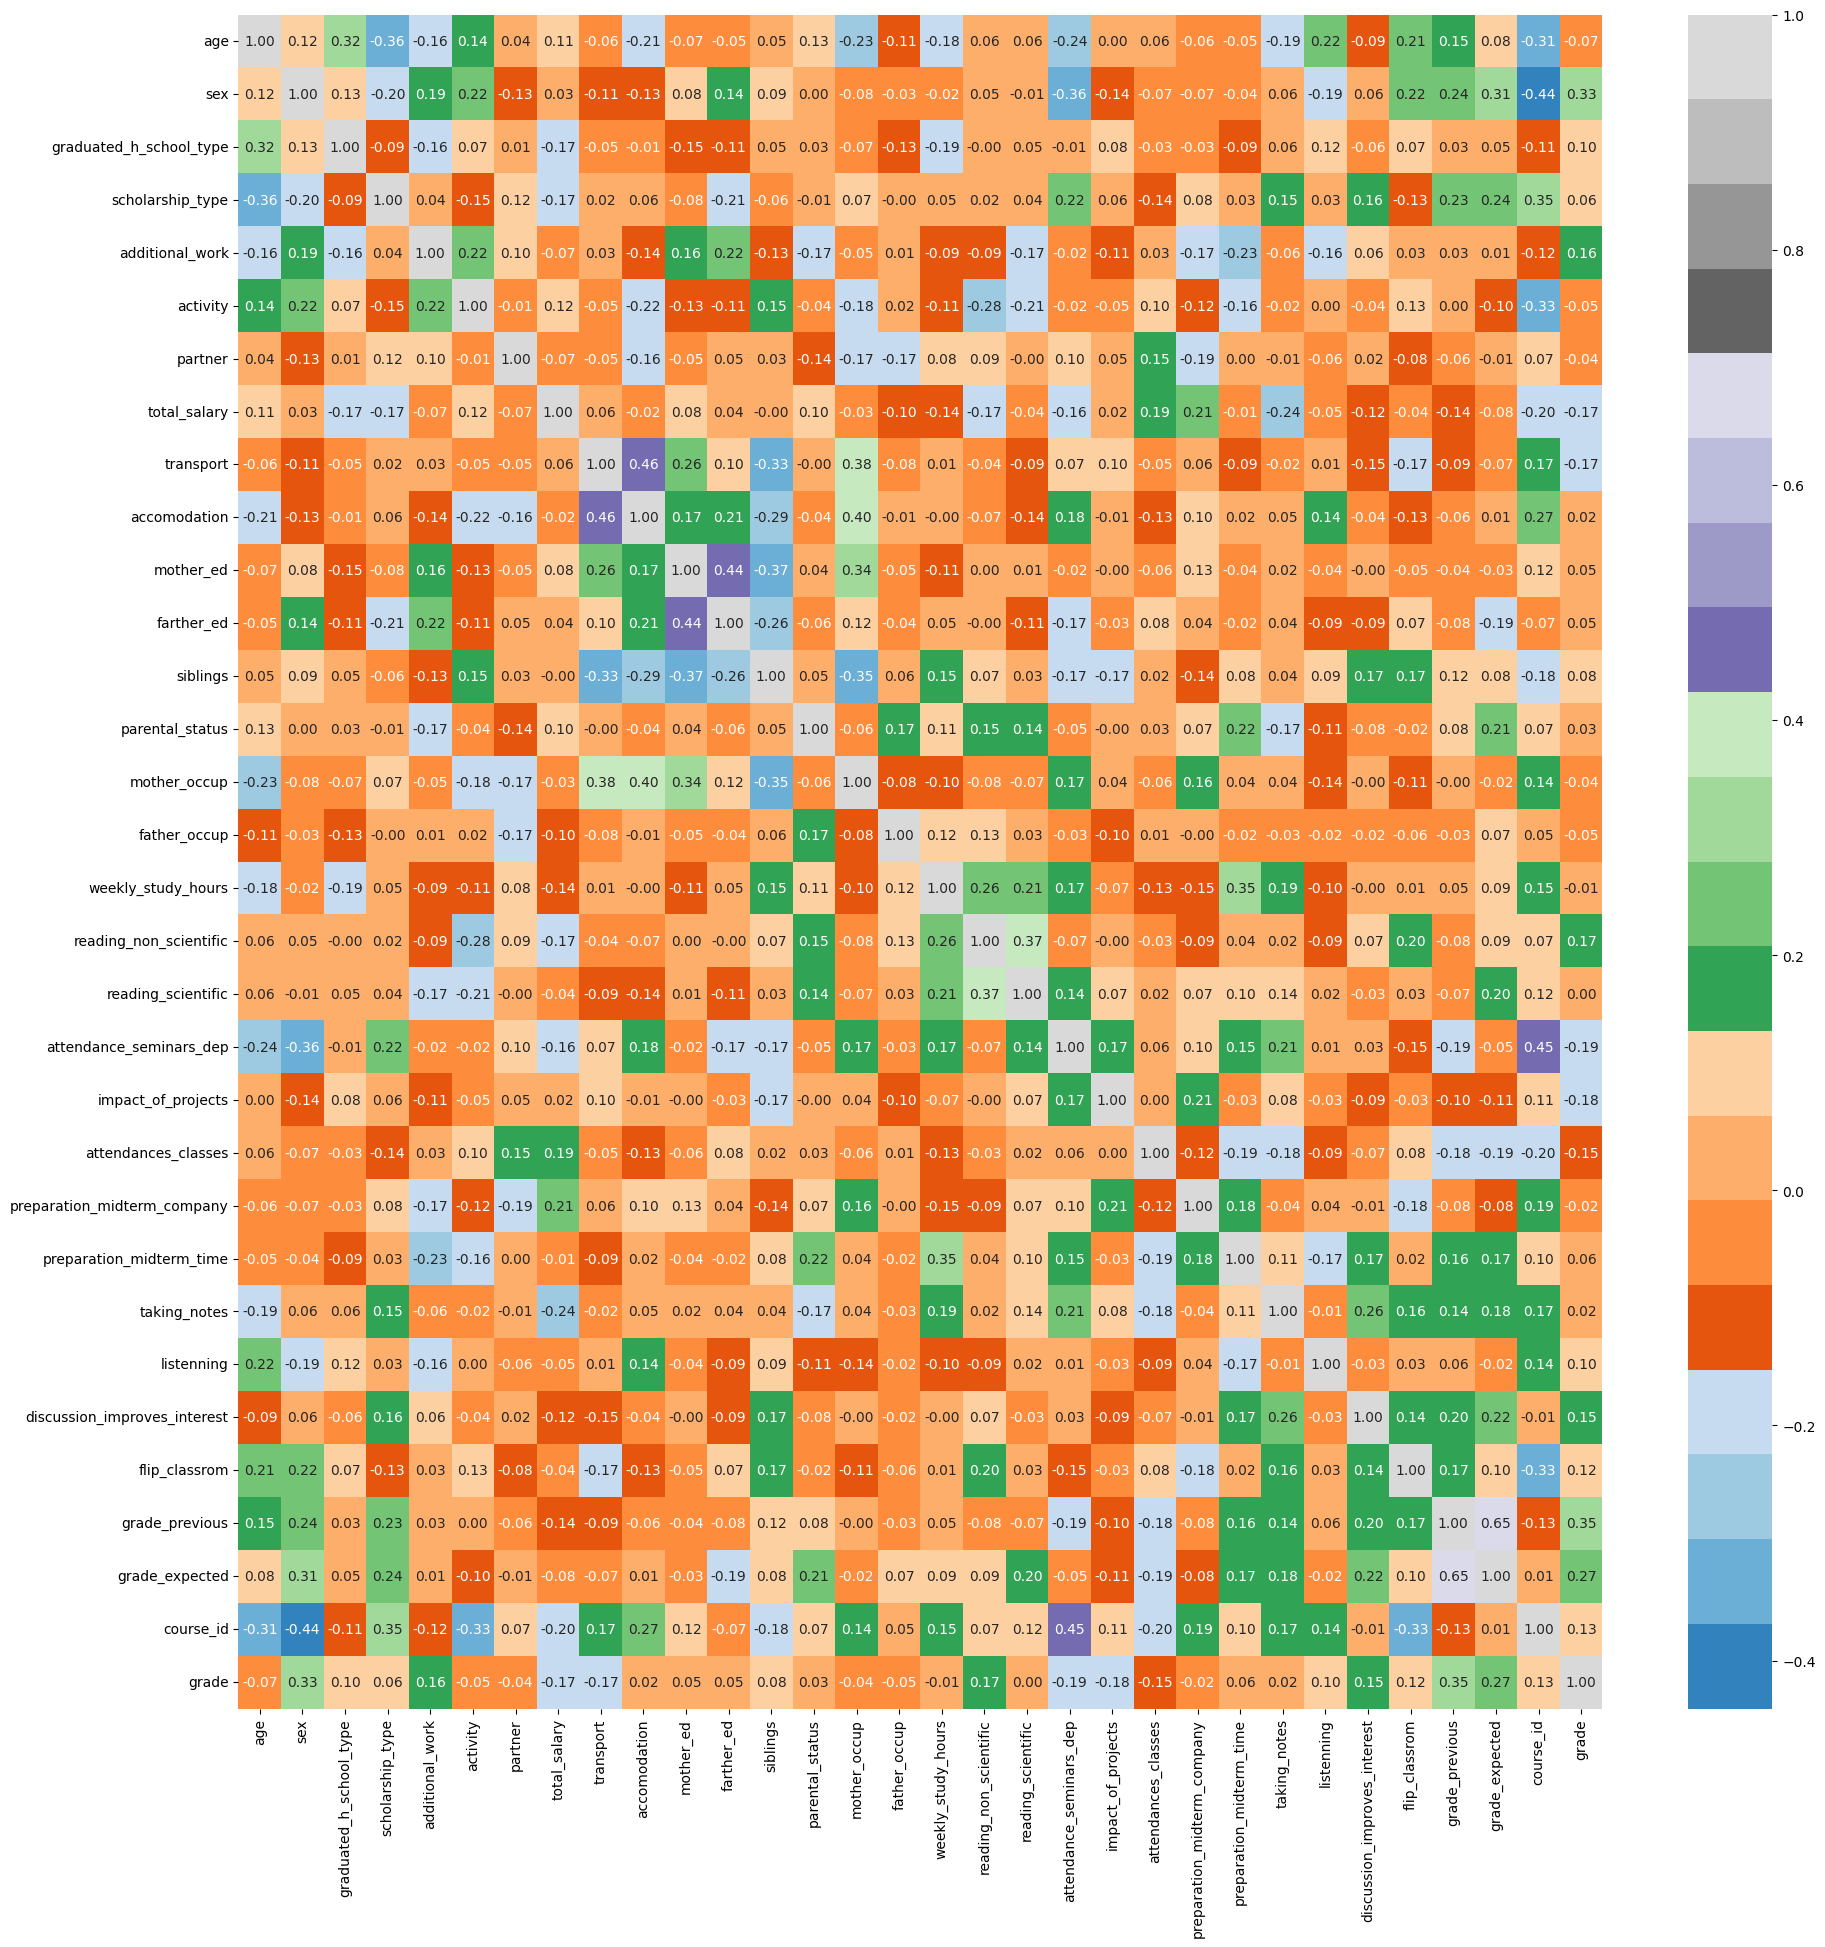

In [13]:
plt.figure(figsize = (22,22))        # Size of the figure
sns.heatmap(df.corr(method = 'spearman'), annot = True, fmt = '.2f', cmap = 'tab20c',)
plt.show()

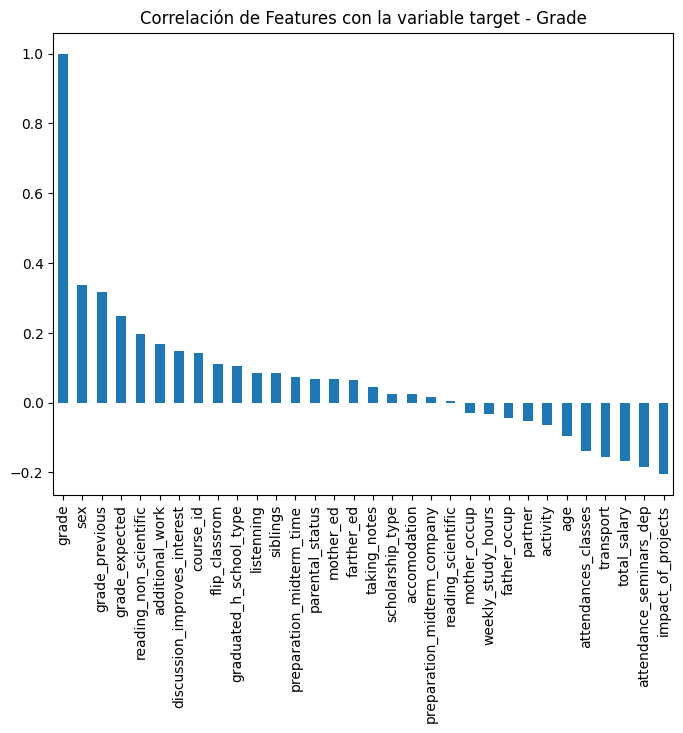

In [47]:
plt.figure(figsize=(8,6))
df.corr()['grade'].sort_values(ascending = False).plot(kind='bar')

plt.title('Correlación de Features con la variable target - Grade')
plt.show();

In [48]:
#Ordenación de la matriz de correlación (la matriz de correlación puede llegar a ser muy grande
#y por lo tanto difícil de interpretar).

corr_pairs = df.corr(method = 'spearman').unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

sorted_pairs.grade

attendance_seminars_dep        -0.191392
impact_of_projects             -0.184830
total_salary                   -0.173366
transport                      -0.165981
attendances_classes            -0.147671
age                            -0.070318
activity                       -0.048392
father_occup                   -0.048095
partner                        -0.040751
mother_occup                   -0.037684
preparation_midterm_company    -0.019000
weekly_study_hours             -0.006369
reading_scientific              0.004179
taking_notes                    0.019061
accomodation                    0.020626
parental_status                 0.025465
farther_ed                      0.045416
mother_ed                       0.046844
preparation_midterm_time        0.057816
scholarship_type                0.064522
siblings                        0.083004
listenning                      0.097159
graduated_h_school_type         0.102091
flip_classrom                   0.118401
course_id       

**R.-** En conclusión a través de la matriz de correlación (correlación no significa causalidad) podemos determinar que las siguientes variables posseen.

_Correlacción débilmente positiva:_


* grade_previous                  0.350804
* sex                             0.331418
* grade_expected                  0.271966
* reading_non_scientific          0.174880
* additional_work                 0.162538
* discussion_improves_interest    0.148469
* course_id                       0.134992
* flip_classrom                   0.118401
* graduated_h_school_type         0.102091


_Correlación débilmente Negativa:_

* attendance_seminars_dep        -0.191392
* impact_of_projects             -0.184830
* total_salary                   -0.173366
* transport                      -0.165981
* attendances_classes            -0.147671
* age                            -0.070318
* activity                       -0.048392
* father_occup                   -0.048095
* partner                        -0.040751
* mother_occup                   -0.037684

Se puede apreciar que exite poca correlación tanto negativa como positiva de las Features con la variable Target, por lo cual se utilizaran todas las Features sin descartar una para el entrenamineto del modelo.


### Modelo Aprendizaje Supervidado - MultiClasifiación

#### Balanceo de clases.

Se realizo balanceo de clases ya que entrega mejores resultados al clasifición Multiclases.

In [16]:
df_Target.value_counts()

grade
1        35
2        24
3        21
5        17
7        17
6        13
4        10
0         8
dtype: int64

In [17]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
df_Features_balance, df_Target_balance = oversample.fit_resample(df_Features, df_Target)

In [18]:
df_Features_balance

,age,sex,graduated_h_school_type,scholarship_type,additional_work,activity,partner,total_salary,transport,accomodation,...,attendances_classes,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,1,2,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,3,2,2,3,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,1,2,2,1,1,2,2,1
3,1,1,1,3,1,2,1,2,1,2,...,1,1,2,3,2,2,1,3,2,1
4,2,2,1,3,2,2,1,3,1,4,...,1,2,1,2,2,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2,2,2,3,1,2,1,2,1,1,...,1,2,2,3,3,2,3,4,3,5
276,1,2,2,3,2,1,1,1,1,2,...,1,1,1,3,2,3,2,2,2,6
277,1,2,2,3,2,2,2,1,1,1,...,1,2,1,3,2,3,2,2,2,3
278,1,2,2,4,2,1,1,1,2,2,...,1,1,1,3,1,2,1,2,3,7


In [19]:
df_Target_balance.value_counts()

grade
0        35
1        35
2        35
3        35
4        35
5        35
6        35
7        35
dtype: int64

#### Validación Cruzada.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_Features_balance, df_Target_balance,   train_size=0.80, test_size=0.2)

#### Modelo Random Forest Classsifier.

Se eligio este tipo de clasificador ya que entrega mejores resultados en sus métricas que otros modelos ML.

In [22]:
#Entrenando al modelo Random Forest Classification en el set de entrenamiento.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100000, criterion = 'entropy',
                                    random_state = 33)
classifier.fit(X_train, y_train.values.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=100000,
                       random_state=33)

In [23]:
#Predicción de los resultados del conjunto de pruebas.
y_pred_RF = classifier.predict(X_test)

In [24]:
#Haciendo la Matriz de Confusión.
from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(y_test.values.ravel(), y_pred_RF)
print(cm_RF)

[[5 0 0 0 0 0 0 0]
 [1 5 2 2 2 0 0 1]
 [0 1 4 1 0 0 0 0]
 [0 0 0 5 0 0 0 0]
 [0 0 0 0 9 0 0 0]
 [0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 4 0]
 [0 0 1 0 0 0 0 5]]


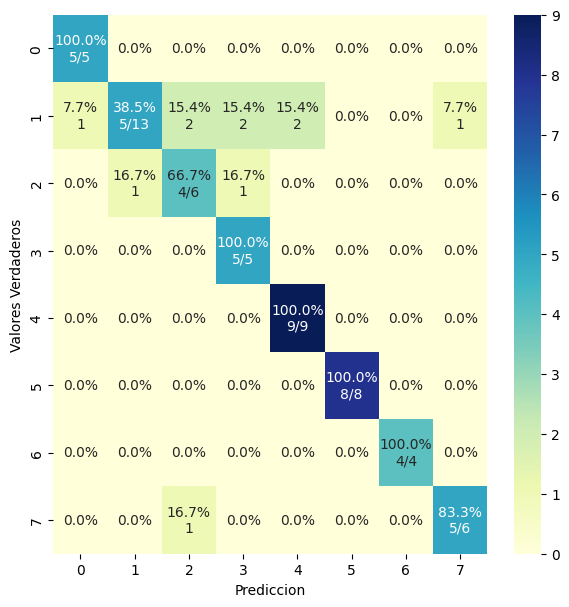

In [27]:
# Aplicación de función de Matriz de Confusión para graficarla.
plot_cm(y_test.values.ravel(), y_pred_RF)

In [28]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

rcRF = recall_score(y_test, y_pred_RF, average='weighted')
acRF = accuracy_score(y_test, y_pred_RF)
f1RF = f1_score(y_test, y_pred_RF, average='weighted')
psRF = precision_score(y_test, y_pred_RF, average='weighted')

In [29]:
print("Métricas de Random Forest.")
print("Recall (Exhaustividad):",round(rcRF*100,3),"%.")
print("Accuracy (Exactitud):",round(acRF*100,3),"%.")
print("Precision (Precisión):",round(psRF*100,3),"%.")
print("F1:",round(f1RF*100,3),"%.")

Métricas de Random Forest.
Recall (Exhaustividad): 80.357 %.
Accuracy (Exactitud): 80.357 %.
Precision (Precisión): 81.995 %.
F1: 78.618 %.


### Importancia de los Features - Random Forest Output's

#### Random Forest Output's

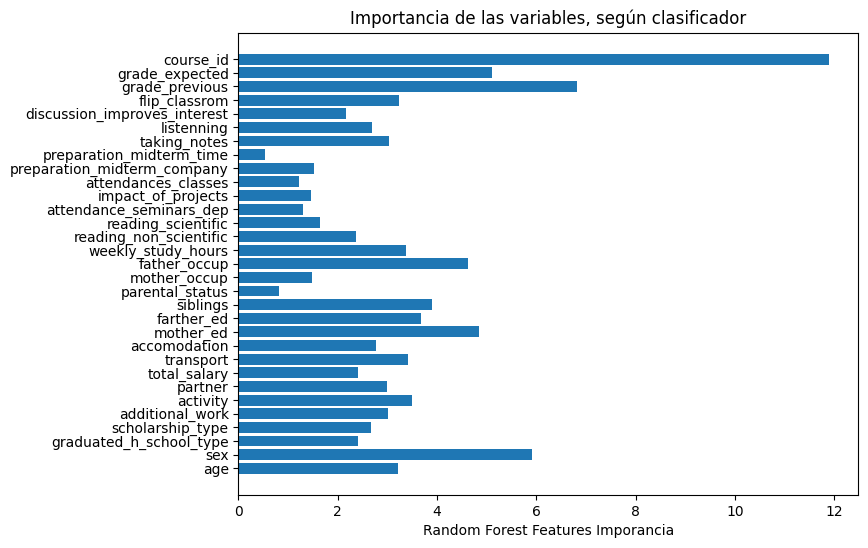

In [38]:
plt.figure(figsize = (8,6))

plt.barh(X.columns, classifier.feature_importances_*100)

plt.title("Importancia de las variables, según clasificador")
plt.xlabel("Random Forest Features Imporancia")
plt.show()

#### Importancia de los Features valores SHARP

Este utilizando los valores de Shapley de la teoría de juegos para estimar cómo contribuye cada característica a la predicción.

In [39]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 11.0 MB/s eta 0:00:00


In [40]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

In [41]:
# Fits the explainer
explainer = shap.Explainer(classifier.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 57it [2:15:21, 145.02s/it]


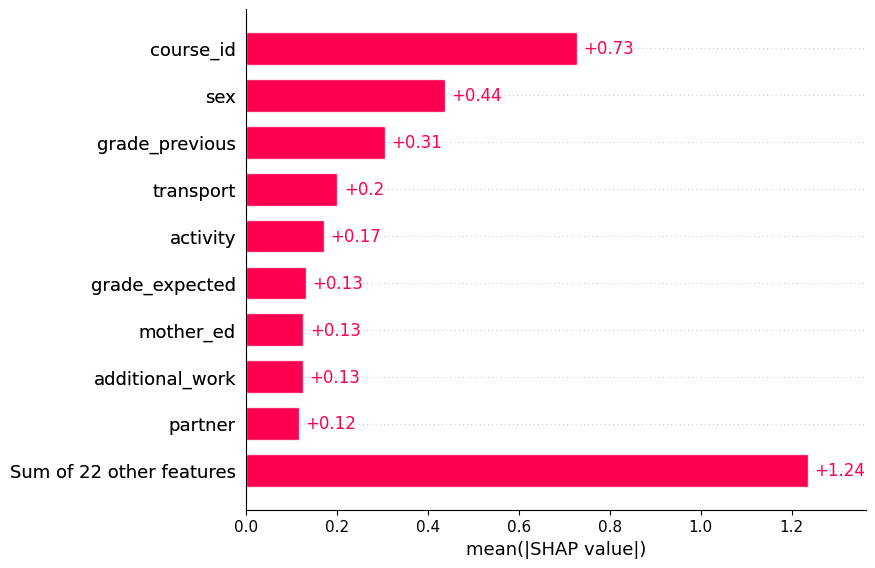

In [42]:
shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


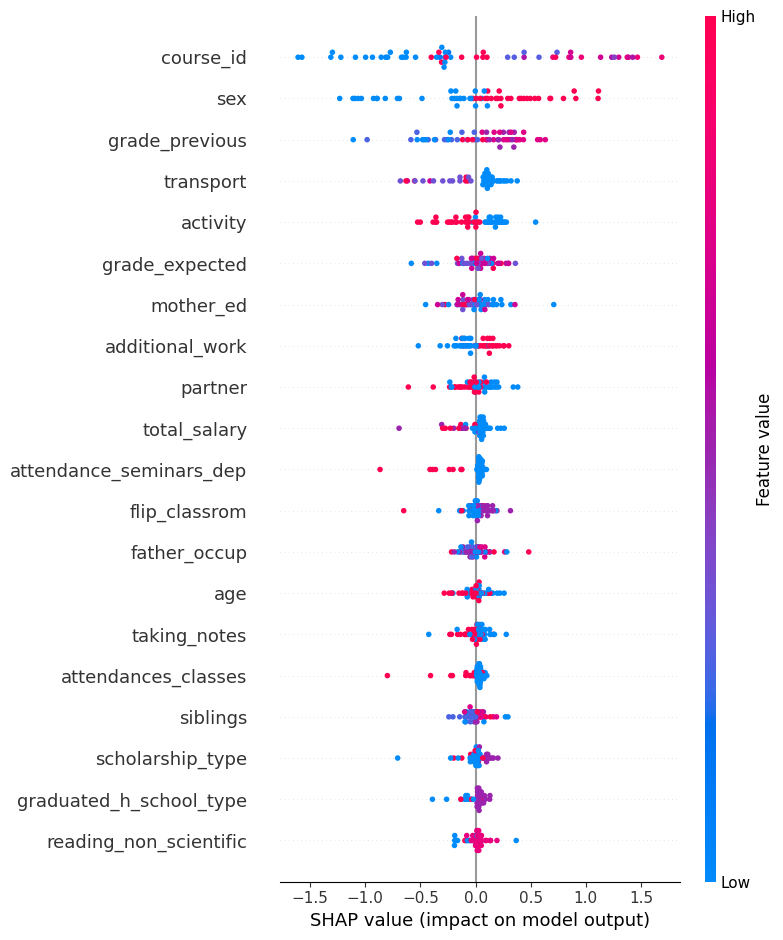

In [43]:
shap.summary_plot(shap_values, X_test)

Estas son las Features que entregan mayor predicción a la clasificación:

* course_id.
* sexo – Sexo del estudiante
* grade_previous - Promedio de calificaciones acumulado en el último semestre.
* transporte - Transporte a la universidad.
* actividad - Actividad artística o deportiva habitual.
* grade_expected - Promedio de calificaciones acumulado esperado en la graduación.
* mother_ed - Educación de la madre.
* adicional_trabajo - Trabajo adicional.
* Pareja - Tienes pareja.


#### Tuning Modelo de Clasificación MultiClase




In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {'criterion':['entropy'],
        'max_depth':[3,5],
        'n_estimators':[100000],
        'max_features':[1,5],
        'min_samples_leaf':[1,5],
        'min_samples_split':[1,5]}

rf_cv = GridSearchCV(RandomForestClassifier() , grid , refit = True, verbose = 2, cv = 5, scoring='accuracy')

In [ ]:
model_rf_grid = rf_cv.fit(X_train, y_train.values.ravel())

In [ ]:
print('Best hyperparameters are: '+str (model_rf_grid .best_params_))
print('Best score is: '+ str(model_rf_grid.best_score_))

_El modelo clasifica bien las personas que se le asigna como 'Fail' en la variable Target - grade, pero clasifica medianamente bien en las etiquetas de tipo (DD, DC) y clasifica bien las etiquetas (CC, CB, BB, BA, AA) hay que dejar en claro que las métricas alcanzan el 80% por lo cual es mejor que lanzar una moneda como problema azaroso, por lo cual podríamos definir que el modelo generaliza bien las características de las Features para predecir las clases, poner cuidado con etiquetados a clases con resultados más bajos que los altos._

**Optimización del modelo**: al modelo se le realizo preprocesamiento de las Features a través de transformar la matriz de Features con Binarización Dummy pero el perfomance del modelo no mejoro, se le realizo espacio de Hiperparametros pero el modelo no mejoro por lo cual se le desistió por no mejorar a través del tunning y por el alto consumo computacional y se utilizó la etiqueta que entrego el estudio No Supervisado de la Evaluación final módulo 7 de las Features que entregan información familiar pero tampoco mejoro el perfomance del modelo.
